In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

# Générer un dataset de régression avec 1000 échantillons, 10 variables indépendantes et un bruit de 0.1
X, y = make_regression(n_samples=300, n_features=2, noise=0.1)

# Afficher la forme (shape) du jeu de données
print(X.shape, y.shape)

(300, 2) (300,)


In [3]:
X[:10]

array([[ 1.44355747,  1.49602438],
       [ 0.09991212,  0.53388109],
       [ 2.16953126,  0.93622951],
       [-0.59467912, -2.73936821],
       [ 1.5135368 ,  0.6948388 ],
       [ 1.30090994, -1.1644402 ],
       [ 0.64673424,  0.76546513],
       [ 1.67824473,  1.46634802],
       [-1.3053947 ,  0.1370236 ],
       [-0.88706305, -2.39193614]])

In [4]:
y[:10]

array([ 120.82487052,   22.15043648,  139.33078596, -117.78287807,
         98.53745021,   28.15041055,   57.09571466,  131.51488316,
        -61.46491274, -121.31720354])

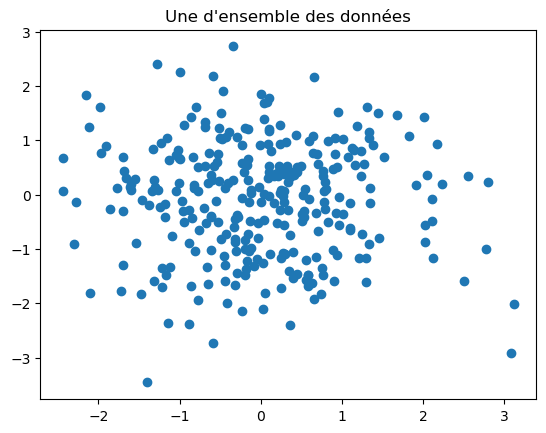

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.title("Une d'ensemble des données")
plt.show()

In [6]:
def initialization(X):
    w = np.random.randn(X.shape[1])
    b = np.random.randn()
    return (w, b)

In [7]:
w, b = initialization(X)
print(f"w = {w}\nb = {b}")

w = [ 0.21173674 -0.90809524]
b = -0.5642824996045938


In [8]:
def linear_fonction(X, w, b):
    return np.matmul(X, w) + b

In [9]:
y_hat = linear_fonction(X,w,b)
y_hat[:10]

array([-1.61716095, -1.02794231, -0.95509858,  1.7974093 , -0.87479095,
        0.76859053, -1.12246034, -1.54052008, -0.965113  ,  1.41999947])

In [10]:
def cost(y, y_hat):
    return np.sum((y_hat-y)**2)/(2*y.shape[0])

In [11]:
cost(y, y_hat)

1908.1689385589716

In [12]:
def gradients(X, y, w, b):
    m = X.shape[0]
    j_w = np.dot(X.T, X.dot(w) + b-y)/m
    j_b = np.sum(X.dot(w) + b-y)/m
    return (j_w, j_b)

In [13]:
j_w, j_b = gradients(X, y, w, b)
print(f"j_w = {j_w}, j_b = {j_b}")

j_w = [-53.00196049 -35.14234747], j_b = 2.764745791602798


In [14]:
def update(X, y, w, b, alpha):
    j_w, j_b = gradients(X, y, w, b)
    w = w - alpha*j_w
    b = b - alpha*j_b
    return (w, b)

In [15]:
update(X, y, w, b, 0.001)

(array([ 0.2647387 , -0.87295289]), -0.5670472453961966)

In [16]:
def gradient_descent(X, y, w, b, alpha=0.001, n_iter = 1000):
    cost_ = []  
    for i in range(n_iter):
        y_hat = linear_fonction(X, w, b)
        cost_.append(cost(y, y_hat))
        w, b = update(X, y, w, b, alpha)
    print(f"First_cost = {cost_[0]}\nLast_cost = {cost_[-1]}")
    print(f"W = {w}\nb = {b}")
    plt.plot(cost_)
    plt.show()

First_cost = 1908.1689385589716
Last_cost = 0.005365711351339526
W = [50.37363646 32.06808891]
b = -0.0017528732341618096


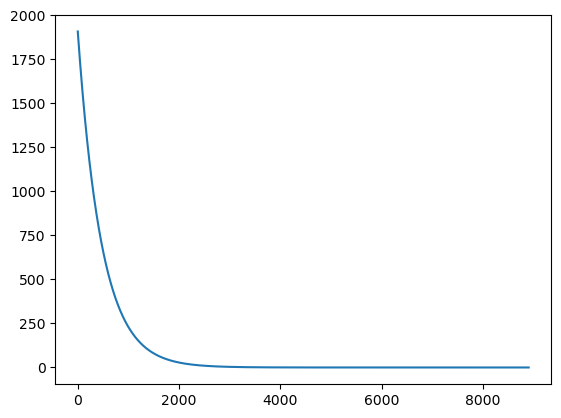

In [17]:
gradient_descent(X, y, w, b, n_iter = 8900)

In [18]:
def predict(X):
    return np.matmul(X, w) + b

In [19]:
y_hat = predict(X)

In [20]:
y_hat[:10]

array([-1.61716095, -1.02794231, -0.95509858,  1.7974093 , -0.87479095,
        0.76859053, -1.12246034, -1.54052008, -0.965113  ,  1.41999947])

# Version 2

In [22]:
def initialization(X):
    w = np.random.randn(X.shape[1])
    b = np.random.randn()
    return (w, b)

In [23]:
def predict(X, w, b):
    return np.dot(X, w) + b

In [24]:
def cost(X, y, w, b):
    m = len(y)
    y_hat = predict(X, w, b)
    return np.sum((y_hat - y)**2) / (2 * m)

In [25]:
def gradient(X, y, w, b):
    m = len(y)
    y_hat = predict(X, w, b)
    dw = np.dot(X.T, (y_hat - y)) / m
    db = np.mean(y_hat - y)
    return dw, db

In [26]:
def train(X, y, w, b, learning_rate, n_iterations):
    costs = []
    for i in range(n_iterations):
        
        y_hat= predict(X, w, b)
        cost_i = cost(X, y, w, b)
        costs.append(cost_i)
        
        dw, db = gradient(X, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            print(f"Iteration {i} : cost = {cost_i}")
            
    return w, b, costs


In [27]:
w, b = initialization(X)

In [28]:
w_, b_,costs = train(X, y, w, b, 0.01, 1000)

Iteration 0 : cost = 1974.7730915463476
Iteration 100 : cost = 235.20342002259665
Iteration 200 : cost = 28.382742556288722
Iteration 300 : cost = 3.478278832767265
Iteration 400 : cost = 0.43700973175284646
Iteration 500 : cost = 0.05989263344466968
Iteration 600 : cost = 0.01235743117952742
Iteration 700 : cost = 0.006261947904959221
Iteration 800 : cost = 0.00546652145282869
Iteration 900 : cost = 0.005360908866497035


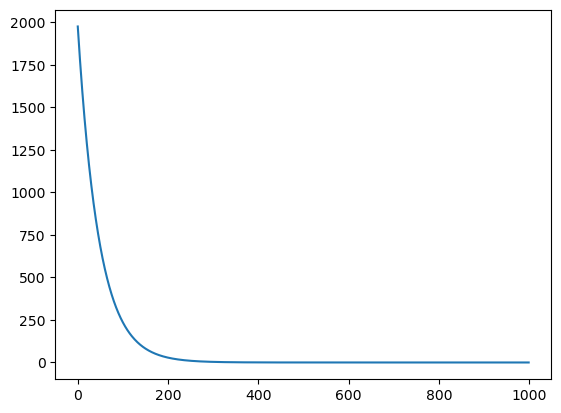

In [29]:
plt.plot(costs)
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y, y_hat, squared=False)

# Calculer le coefficient de détermination (R²)
r2 = r2_score(y, y_hat)

# Afficher les résultats
print('RMSE:', rmse)
print('R²:', r2)

RMSE: 61.776515579287434
R²: -0.012633216260934388


In [149]:
import numpy as np

class LinearRegression:
    """
    Régression linéaire avec la descente de gradient
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        self.costs = []
    
    def fit(self, X, y):
        # Normalization of the features
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X = (X - mean) / std

        self.w = np.random.randn(X.shape[1])
        self.b = 0
        
        for i in range(self.n_iterations):
            y_hat = self.predict(X)
            cost_i = self.cost(X, y)
            self.costs.append(cost_i)

            # Gradients descent
            dw, db = self.gradient(X, y)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if i % 100 == 0:
                print(f"Iteration {i} : cost = {cost_i}")

    def predict(self, X):
        y_hat = np.matmul(X, self.w) + self.b
        return y_hat

    def cost(self, X, y):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X = (X - mean) / std

        m = len(y)
        y_hat = self.predict(X)
        return np.sum((y_hat - y)**2) / (2 * m)

    def gradient(self, X, y):
        m = X.shape[0]
        j_w = (1/m) * np.matmul(X.T, np.matmul(X, self.w) + b - y)
        j_b = (1/m) * np.sum(np.matmul(X, self.w) + b - y)
        return (j_w, j_b)

    def score(self, X, y):
        y_hat = self.predict(X)
        ss_res = np.sum((y - y_hat)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - (ss_res / ss_tot)

        return r2

    def plot_cost(self):
        import matplotlib.pyplot as plt
        plt.plot(self.costs)
        plt.xlabel("Nombre d'itérations")
        plt.ylabel("Fonction de coût")
        plt.title("Apprentissage de la régression linéaire avec la descente de gradient")
        plt.show()


In [191]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X, y = california.data, california.target

In [192]:
X.shape

(20640, 8)

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"X_train : {X_train.shape}\nX_test : {X_test.shape}")

X_train : (14448, 8)
X_test : (6192, 8)


In [194]:
w = np.random.randn(X_train.shape[1])
b = 0

In [195]:
w

array([-0.34599958, -0.59214479,  2.26072964,  0.91255674, -0.01854483,
       -0.01894474, -0.16903714, -0.01982737])

In [196]:
(np.matmul(X_train, w) + b).shape

(14448,)

In [197]:
m = X_train.shape[0]
j_w = (1/m) * np.matmul(X_train.T, np.matmul(X_train, w) + b - y_train)
j_b = (1/m) * np.sum(np.matmul(X_train, w) + b - y_train)

# Vérifier les dimensions des gradients
print(j_w)  # devrait être (2, 1)
print(j_b)  # devrait être un scalaire


[-1.41746747e+02 -1.09054015e+03 -1.84231523e+02 -3.77585991e+01
 -7.53718918e+04 -1.25322924e+02 -1.32052269e+03  4.44925442e+03]
-37.23164909728779


In [221]:
L =LinearRegression(0.001, 1300)
L.fit(X_train, y_train)

Iteration 0 : cost = 5.276841839117968
Iteration 100 : cost = 4.227026910036307
Iteration 200 : cost = 3.398915124807732
Iteration 300 : cost = 2.7396830612995826
Iteration 400 : cost = 2.212633718429792
Iteration 500 : cost = 1.7921682863788355
Iteration 600 : cost = 1.4603465411721577
Iteration 700 : cost = 1.20452980658227
Iteration 800 : cost = 1.015762471628613
Iteration 900 : cost = 0.8876580321511504
Iteration 1000 : cost = 0.8156303073877478
Iteration 1100 : cost = 0.796361225584863
Iteration 1200 : cost = 0.827431072991162


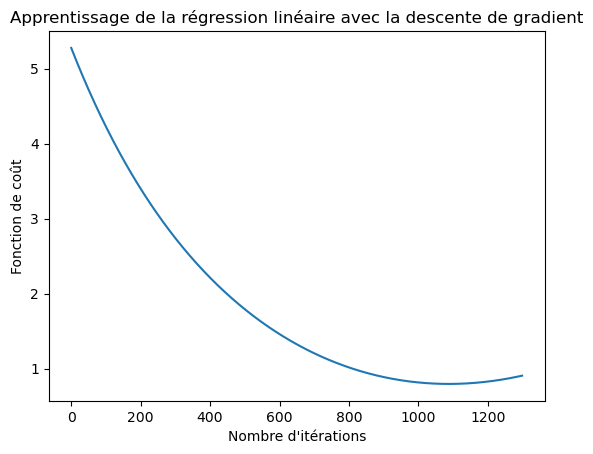

In [222]:
L.plot_cost()

In [219]:
L.score(X_test, y_test)

-402066.7492498711

### Stéphane KPOVIESSI